In [3]:
# prerequisite package imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [4]:
fuel_econ = pd.read_csv('./data/fuel_econ.csv')
fuel_econ.head()

,id,make,model,year,VClass,drive,trans,fuelType,cylinders,displ,pv2,pv4,city,UCity,highway,UHighway,comb,co2,feScore,ghgScore
0,32204,Nissan,GT-R,2013,Subcompact Cars,All-Wheel Drive,Automatic (AM6),Premium Gasoline,6,3.8,79,0,16.4596,20.2988,22.5568,30.1798,18.7389,471,4,4
1,32205,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (AM-S6),Premium Gasoline,4,2.0,94,0,21.8706,26.9770,31.0367,42.4936,25.2227,349,6,6
2,32206,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.6,94,0,17.4935,21.2000,26.5716,35.1000,20.6716,429,5,5
3,32207,Volkswagen,CC 4motion,2013,Compact Cars,All-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.6,94,0,16.9415,20.5000,25.2190,33.5000,19.8774,446,5,5
4,32208,Chevrolet,Malibu eAssist,2013,Midsize Cars,Front-Wheel Drive,Automatic (S6),Regular Gasoline,4,2.4,0,95,24.7726,31.9796,35.5340,51.8816,28.6813,310,8,8


In [5]:
# getting data to draw
# counts = fuel_econ.groupby(['make', 'comb']).size()
# counts = counts.reset_index(name = 'count')
# finding high makers
high_makers = (fuel_econ.groupby(['make']).size() > 80)
high_makers = high_makers[high_makers.values]

In [6]:
# comparing with high makers
fuel_econ = fuel_econ[fuel_econ['make'].isin(high_makers.index)]

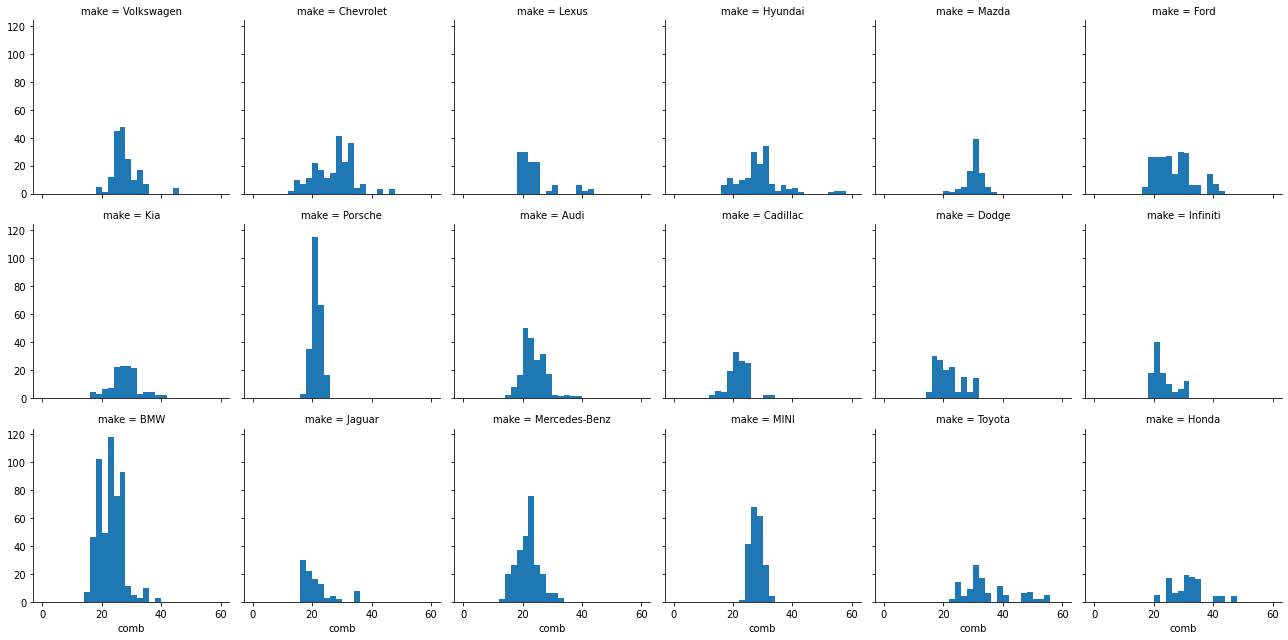

In [7]:
# drawing
g = sb.FacetGrid(data = fuel_econ, col='make', col_wrap = 6)
g.map(plt.hist, 'comb', bins = np.arange(0, 60+2, 2));

<AxesSubplot:xlabel='comb', ylabel='make'>

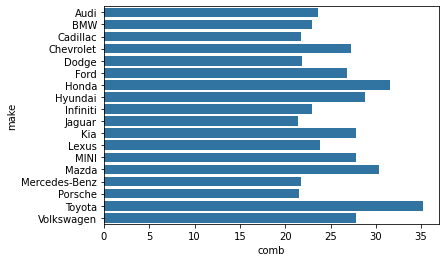

In [8]:
means = fuel_econ.groupby(['make']).mean()
base_color = sb.color_palette()[0]
sb.barplot(data = means, y = means.index, x = 'comb', color=base_color);